# In this notebook:

## 1. Set up notebook with visualization libraries and import cleaned data set.
## 2. Use questions defined while cleaning data to choose variables suitable for exploratory visual analysis.
## 3. Create correlations matrix heatmap.
## 3a. Discuss the relationships between variables based on correlation coefficients.
## 4. Create scatterplots for variables with strong correlations.
## 4a. Discuss the output.
## 5. Create pair plot of entire data set.

In [1]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# 1. Set path

path = r'D:\Data Analytics\Flight Delay Analysis\01 - Data\Wrangled Data'

In [3]:
# 1. Import data

df = pd.read_csv(os.path.join(path, 'all_flights.csv'), index_col=0)

C:\Users\Josh Wattay\AppData\Local\Temp\ipykernel_13696\881997567.py:3: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'all_flights.csv'), index_col=0)


In [4]:
# 1. Check output and shape

df.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Flight_Date,Marketing_Airline_Network_Code,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,...,Distance_Group,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Duplicate,Missing_Due_To_Cancellation,Airline,Marketing_Airline_Network
5,2019,1,1,4,5,2019-01-04,UA,OO,N114SY,5661,...,3,NaN,NaN,NaN,NaN,NaN,N,False,SkyWest Airlines Inc.,United Airlines Inc.
6,2019,1,1,4,5,2019-01-04,UA,OO,N945SW,5664,...,3,NaN,NaN,NaN,NaN,NaN,N,False,SkyWest Airlines Inc.,United Airlines Inc.
9,2019,1,1,4,5,2019-01-04,UA,OO,N145SY,5668,...,3,NaN,NaN,NaN,NaN,NaN,N,False,SkyWest Airlines Inc.,United Airlines Inc.
11,2019,1,1,4,5,2019-01-04,UA,OO,N693BR,5670,...,3,13.0,0.0,3.0,0.0,10.0,N,False,SkyWest Airlines Inc.,United Airlines Inc.
12,2019,1,1,4,5,2019-01-04,UA,OO,N213SY,5671,...,1,NaN,NaN,NaN,NaN,NaN,N,False,SkyWest Airlines Inc.,United Airlines Inc.


In [5]:
df.tail()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Flight_Date,Marketing_Airline_Network_Code,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,...,Distance_Group,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Duplicate,Missing_Due_To_Cancellation,Airline,Marketing_Airline_Network
7013492,2022,4,12,1,4,2022-12-01,UA,YX,N739YX,3414,...,1,NaN,NaN,NaN,NaN,NaN,N,False,Republic Airlines,United Airlines Inc.
7013493,2022,4,12,1,4,2022-12-01,UA,YX,N643RW,3413,...,2,0.0,0.0,0.0,0.0,48.0,N,False,Republic Airlines,United Airlines Inc.
7013494,2022,4,12,1,4,2022-12-01,UA,YX,N729YX,3410,...,3,NaN,NaN,NaN,NaN,NaN,N,False,Republic Airlines,United Airlines Inc.
7013495,2022,4,12,1,4,2022-12-01,UA,YX,N646RW,3409,...,1,NaN,NaN,NaN,NaN,NaN,N,False,Republic Airlines,United Airlines Inc.
7013500,2022,4,12,1,4,2022-12-01,UA,YX,N750YX,3401,...,2,NaN,NaN,NaN,NaN,NaN,N,False,Republic Airlines,United Airlines Inc.


In [6]:
df.shape

(12608046, 47)

## 2. Use questions defined while cleaning data to choose variables suitable for exploratory visual analysis.

#### Based on said questions, the following variables are suitable for exploratory visual analysis: Year, Quarter, Month, Day_of_Month, Day_of_Week, Carrier_Delay, Weather_Delay, NAS_Delay, Late_Aircraft_Delay, Distance, and Security_Delay.

#### I will start by subsetting for delayed flights since the hypothesis is addressing change in delay types.

#### Hypothesis: Carrier Delays and Late Aircraft Delays increased after the pandemic in 2020.

## 3. Create correlations matrix heatmap.

In [7]:
# Filter rows where any delay column is >= 1

delay_columns = ['Carrier_Delay', 'Late_Aircraft_Delay', 'NAS_Delay', 'Security_Delay', 'Weather_Delay']
filtered_df = df[(df[delay_columns] >= 1).any(axis=1)]

In [8]:
# Select the required columns

df_sub = filtered_df[['Year', 'Quarter', 'Month', 'Day_of_Week', 'Day_of_Month', 
                         'Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 
                         'Late_Aircraft_Delay', 'Security_Delay', 'Distance']]

In [9]:
# Display the subset DataFrame

print(df_sub)

         Year  Quarter  Month  Day_of_Week  Day_of_Month  Carrier_Delay  \
11       2019        1      1            5             4           13.0   
50       2019        1      1            5             4            0.0   
59       2019        1      1            5             4           60.0   
65       2019        1      1            5             4            0.0   
101      2019        1      1            5             4          135.0   
...       ...      ...    ...          ...           ...            ...   
7013478  2022        4     12            4             1           52.0   
7013484  2022        4     12            4             1           23.0   
7013486  2022        4     12            4             1           16.0   
7013487  2022        4     12            4             1            7.0   
7013493  2022        4     12            4             1            0.0   

         Weather_Delay  NAS_Delay  Late_Aircraft_Delay  Security_Delay  \
11                 0.0   

In [10]:
# 3. Now create a correlation matrix with this subset

df_sub.corr()

,Year,Quarter,Month,Day_of_Week,Day_of_Month,Carrier_Delay,Weather_Delay,NAS_Delay,Late_Aircraft_Delay,Security_Delay,Distance
Year,1.000000,0.061308,0.062968,0.039559,0.007258,0.045115,-0.000219,-0.065120,-0.029157,0.008701,0.026710
Quarter,0.061308,1.000000,0.970685,-0.020279,0.060044,0.007215,-0.011170,-0.026538,0.002669,0.000412,0.016837
Month,0.062968,0.970685,1.000000,-0.020035,0.062341,0.006839,-0.011531,-0.026900,0.002966,-0.000511,0.020053
Day_of_Week,0.039559,-0.020279,-0.020035,1.000000,-0.018825,0.014177,-0.004440,-0.013665,-0.000918,0.007501,0.008954
Day_of_Month,0.007258,0.060044,0.062341,-0.018825,1.000000,0.001309,0.001664,0.000184,-0.000070,-0.004763,0.003844
Carrier_Delay,0.045115,0.007215,0.006839,0.014177,0.001309,1.000000,-0.042880,-0.105548,-0.064471,-0.013806,0.006776
Weather_Delay,-0.000219,-0.011170,-0.011531,-0.004440,0.001664,-0.042880,1.000000,-0.009637,-0.011409,-0.004269,-0.025904
NAS_Delay,-0.065120,-0.026538,-0.026900,-0.013665,0.000184,-0.105548,-0.009637,1.000000,-0.101814,-0.009617,0.050301
Late_Aircraft_Delay,-0.029157,0.002669,0.002966,-0.000918,-0.000070,-0.064471,-0.011409,-0.101814,1.000000,-0.010280,-0.044112
Security_Delay,0.008701,0.000412,-0.000511,0.007501,-0.004763,-0.013806,-0.004269,-0.009617,-0.010280,1.000000,0.006942


In [11]:
# 3. Begin creating colored correlation matrix heatmap by defining correlation matrix

correlation_matrix = df_sub.corr()

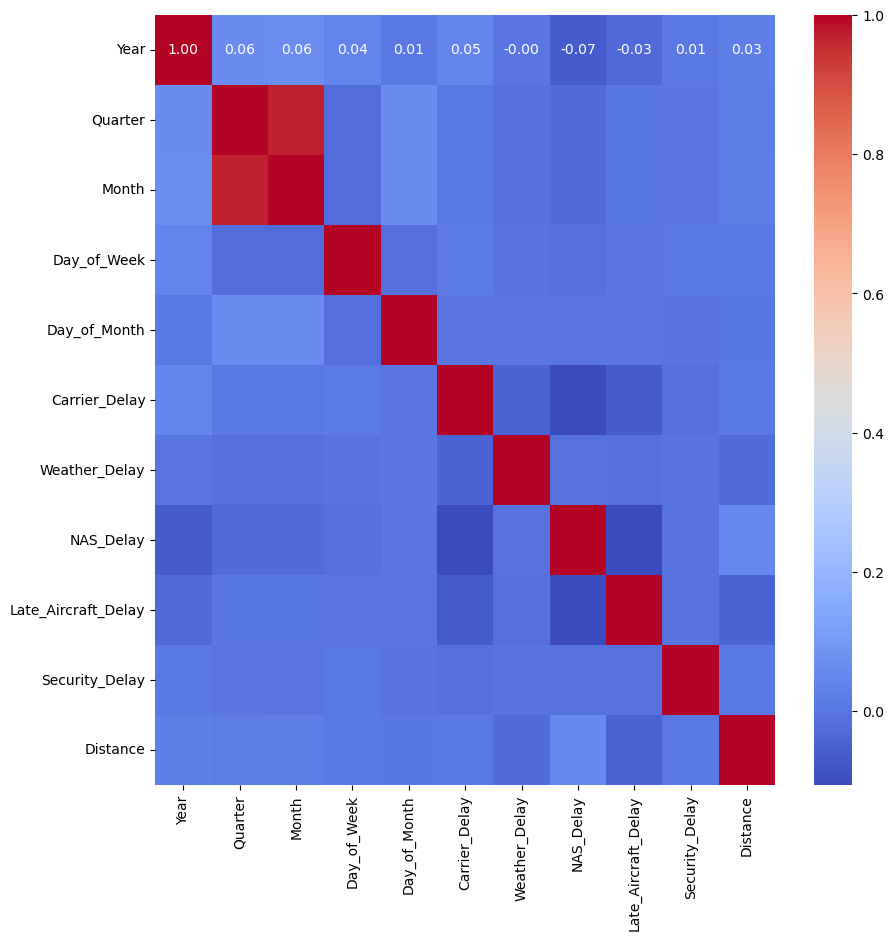

In [12]:
# 3. Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# 3. Create the correlation heatmap in seaborn 
corr = sns.heatmap(df_sub.corr(), annot = True, fmt=".2f", cmap='coolwarm', ax = ax) 

## 3a. Discuss the relationships between variables based on correlation coefficients.

### There is a strong correlation between Departure Delay Minutes and Arrival Delay Minutes (0.97) which makes sense, given that the longer a flight is delayed in departing from the airport, the longer it will be delayed in arriving to its destination. 

### There is a weak positive correlation between NAS Delay and Distance, suggesting a small increase in NAS Delay minutes as the Distance of the Flight increases.

## 4. Create scatterplots for variables with strong correlations.

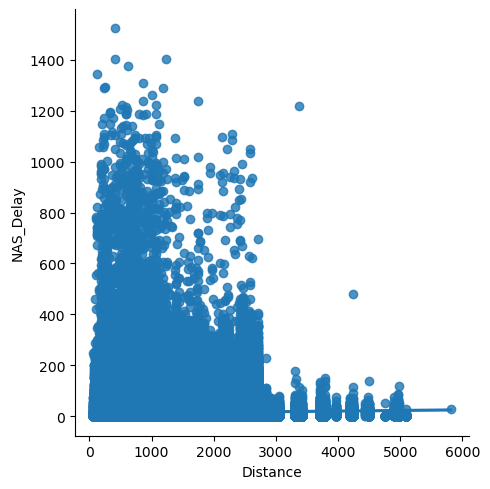

In [13]:
# Create a scatterplot for "Dep_Delay_Minutes" and "Arr_Delay_Minutes" columns

sns.lmplot(x = 'Distance', y = 'NAS_Delay', data = df_sub)

## 4a. The visual of the plot appears to show a negative correlation between distance and NAS_Delay, however, the trend line is flat to slightly positive.

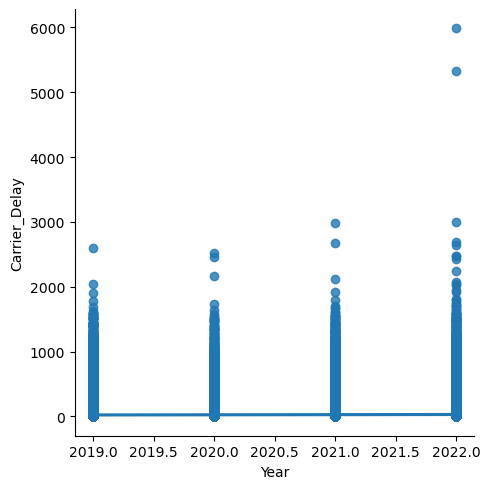

In [14]:
# Create a scatterplot for "Year" and "Carrier_Delay" columns

sns.lmplot(x = 'Year', y = 'Carrier_Delay', data = df_sub)

## 4a. There is a slight decrease in the range and concentration from 2019 to 2020, then in 2021 and 2022, the carrier delay range and concentration grows larger than pre-pandemic levels as the airline industry starts to recover.

## 5. Create pair plot of entire data set.

In [15]:
# Create a Subset for the upcoming Pair Plot using the relevant data mentioned above

pairplot_subset = df_sub[['Year', 'Quarter', 'Month', 'Carrier_Delay', 
                          'Weather_Delay', 'NAS_Delay', 'Late_Aircraft_Delay', 
                          'Security_Delay', 'Distance']]

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

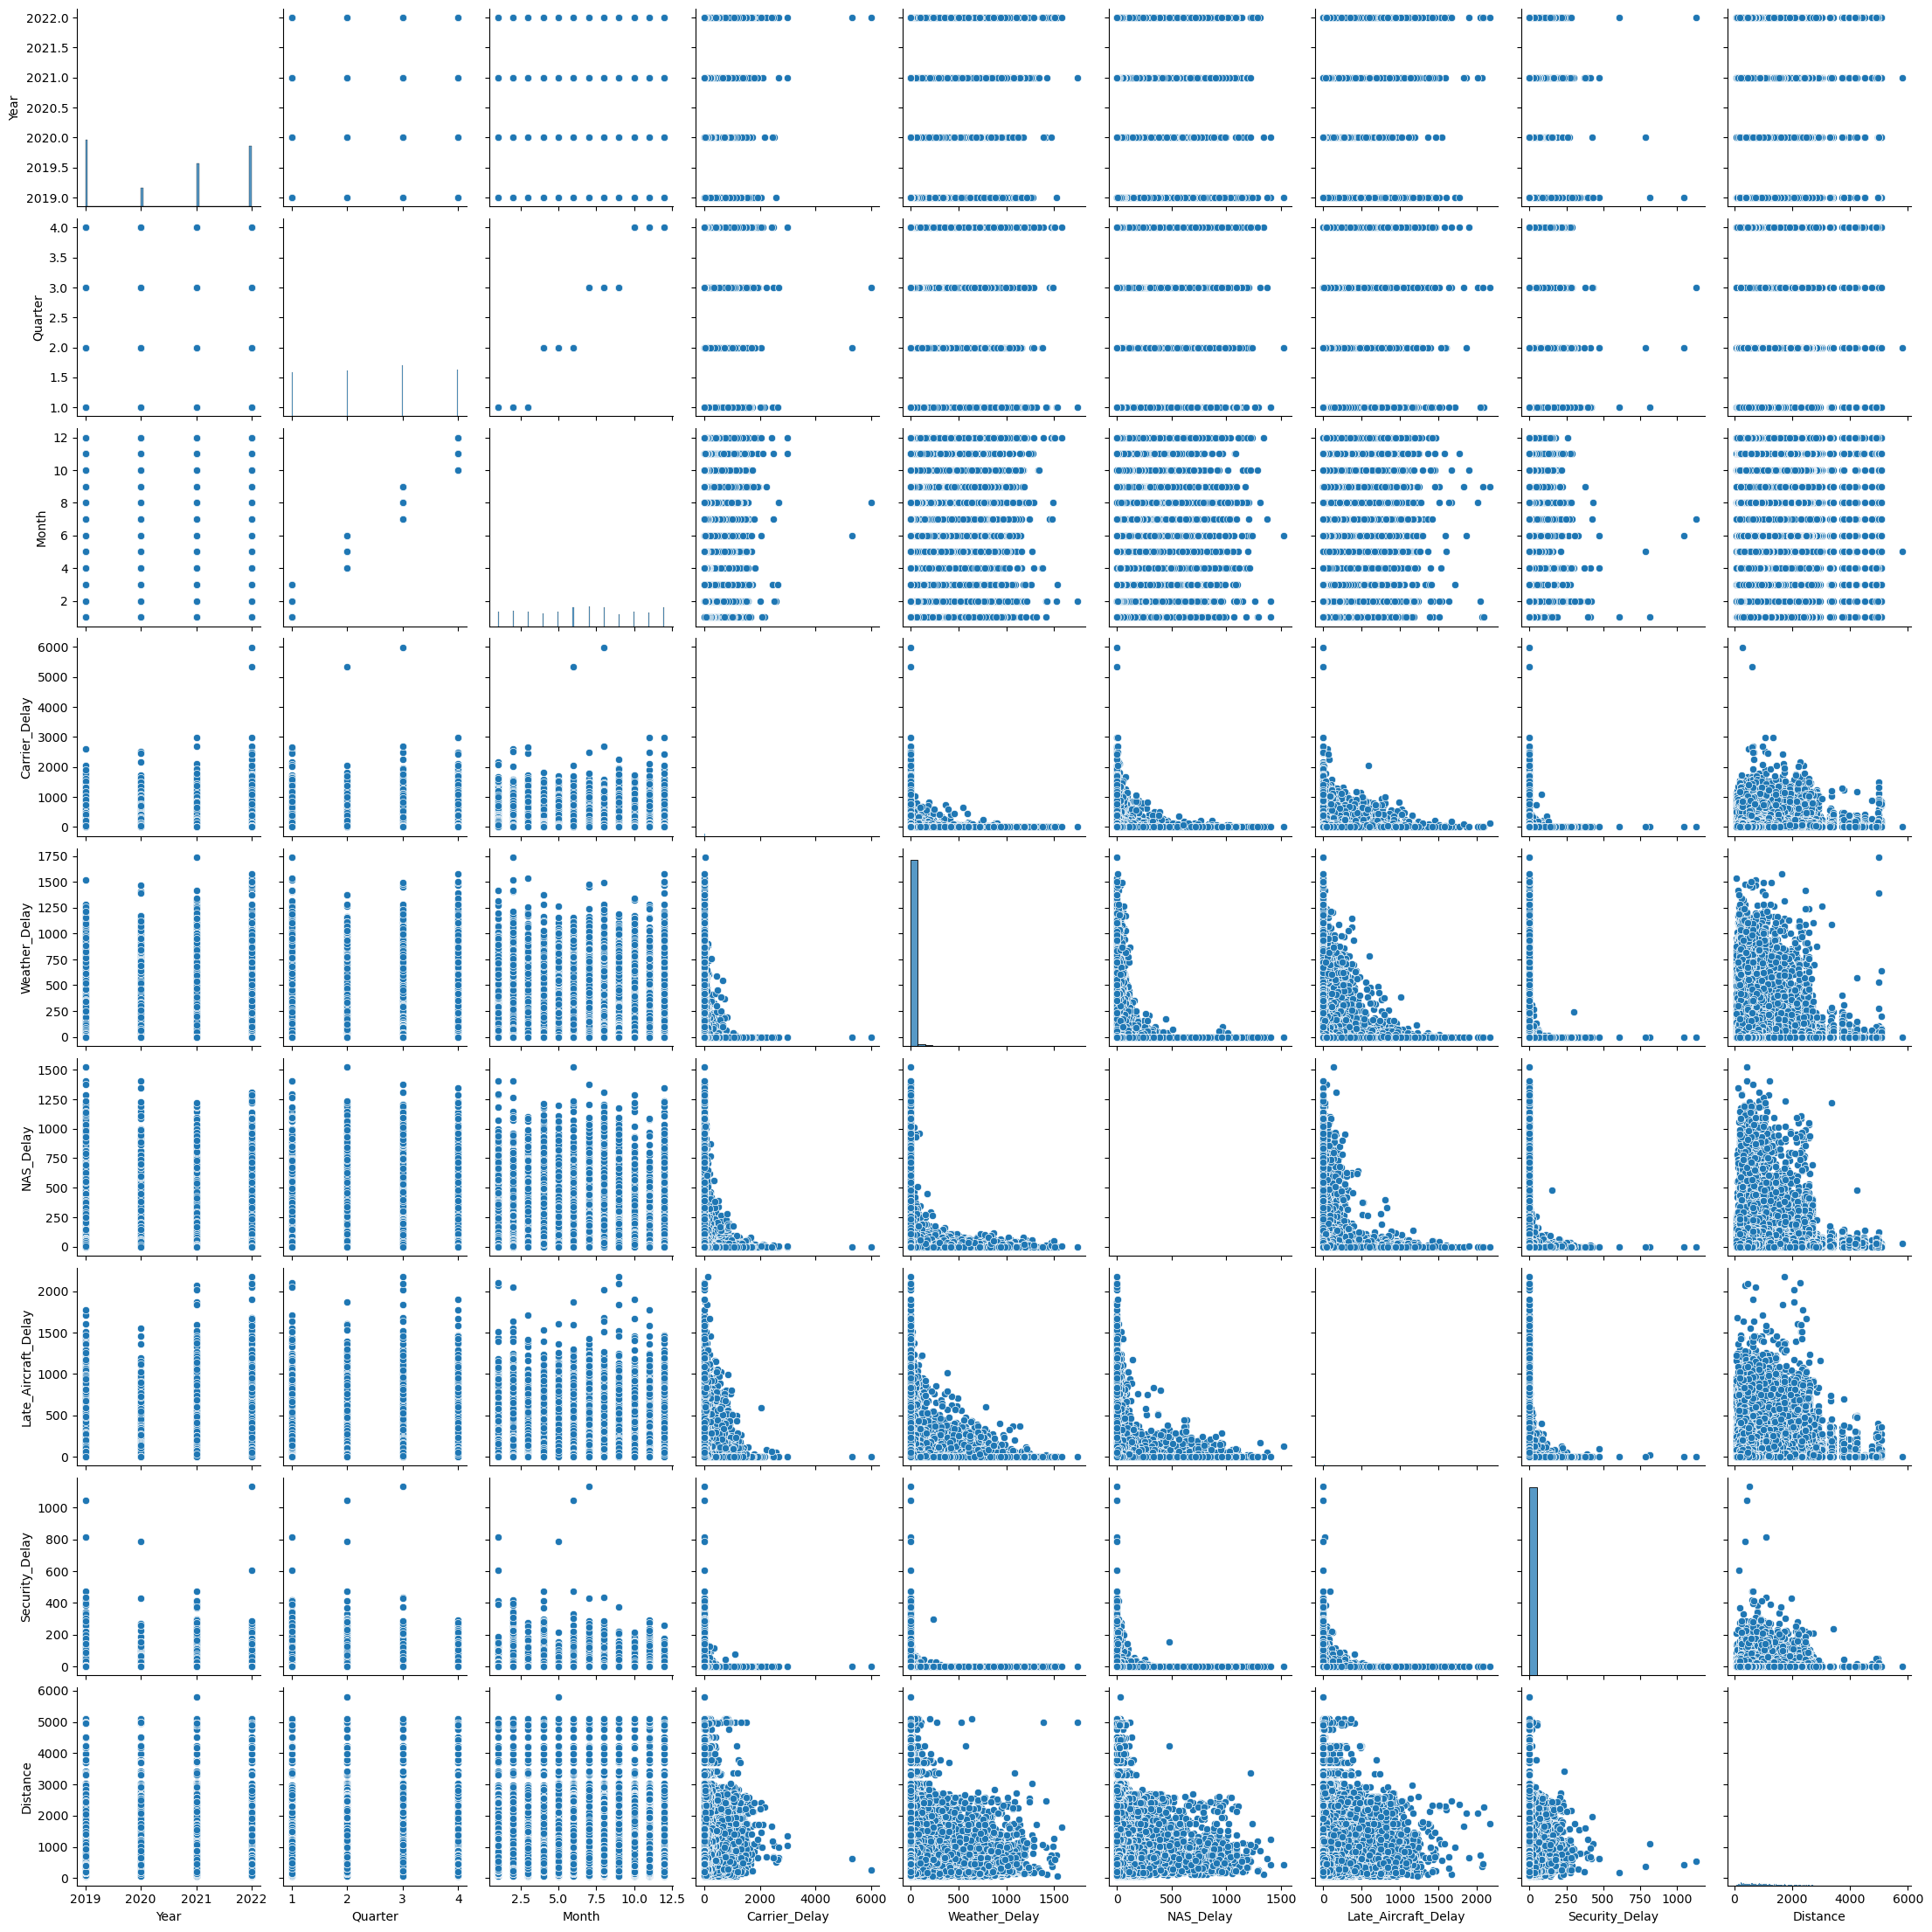

In [16]:
# Create the Pair Plot 

fpp = sns.pairplot(pairplot_subset)

In [17]:
# Export filtered_df as .csv for further analysis

filtered_df.to_csv(os.path.join(path, 'delayed_flights.csv'))

In [18]:
filtered_df.shape

(2249253, 47)